# Analysis of Fraud Detection Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
# dataset = https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')
df_train = df_train.drop(columns='Unnamed: 0')
df_test = df_test.drop(columns='Unnamed: 0')
df_train = df_train.dropna()
df_test = df_test.dropna()
df_test.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

## Train/Test Distributions
The first step is an analysis of the provided dataset. The given dataset is already splitted into train and test sets and it is necessary to determine whether we can or cannot follow the given splitting. We need to check are the sets are representative and follow similar distributions or whether they are just randomly split and can cause an imbalance of information.

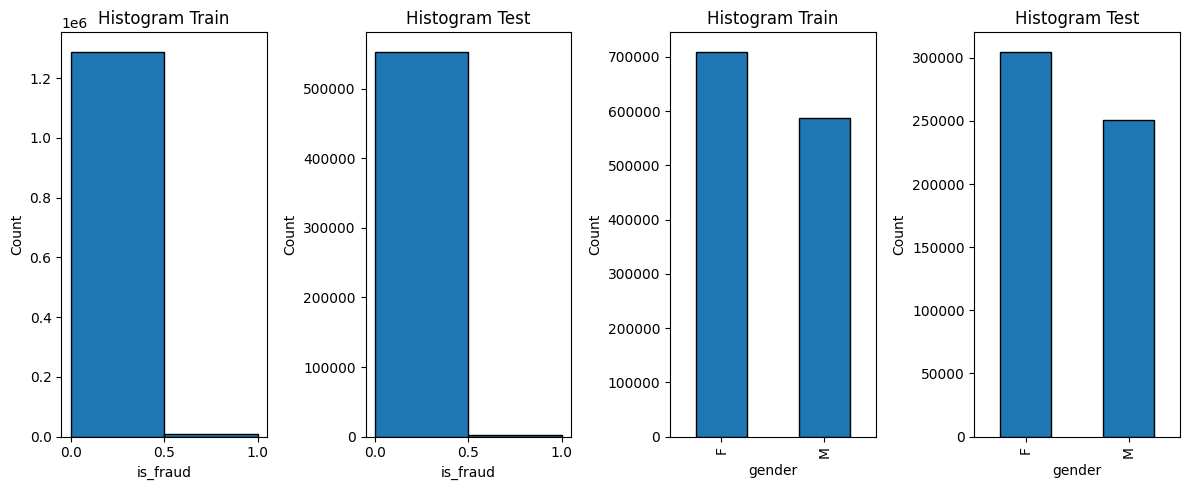

In [3]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)  
df_train['is_fraud'].plot.hist(bins=2, edgecolor='black')
plt.title('Histogram Train')  
plt.xlabel('is_fraud')
plt.ylabel('Count')

plt.subplot(1, 4, 2)  
df_test['is_fraud'].plot.hist(bins=2, edgecolor='black')
plt.title('Histogram Test') 
plt.xlabel('is_fraud')
plt.ylabel('Count')

plt.subplot(1, 4, 3)  
counts_tr = df_train['gender'].value_counts()
counts_tr.plot.bar(edgecolor='black')
plt.title('Histogram Train')  
plt.xlabel('gender')
plt.ylabel('Count')

plt.subplot(1, 4, 4)  
counts_ts = df_test['gender'].value_counts()
counts_ts.plot.bar(edgecolor='black')
plt.title('Histogram Test') 
plt.xlabel('gender')
plt.ylabel('Count')

plt.tight_layout()  
plt.show()

The first information that we see if the fact that classes in a dataset are imbalanced and there is a need to take that into account in our model. However, provided train/test split follows similar distributions.

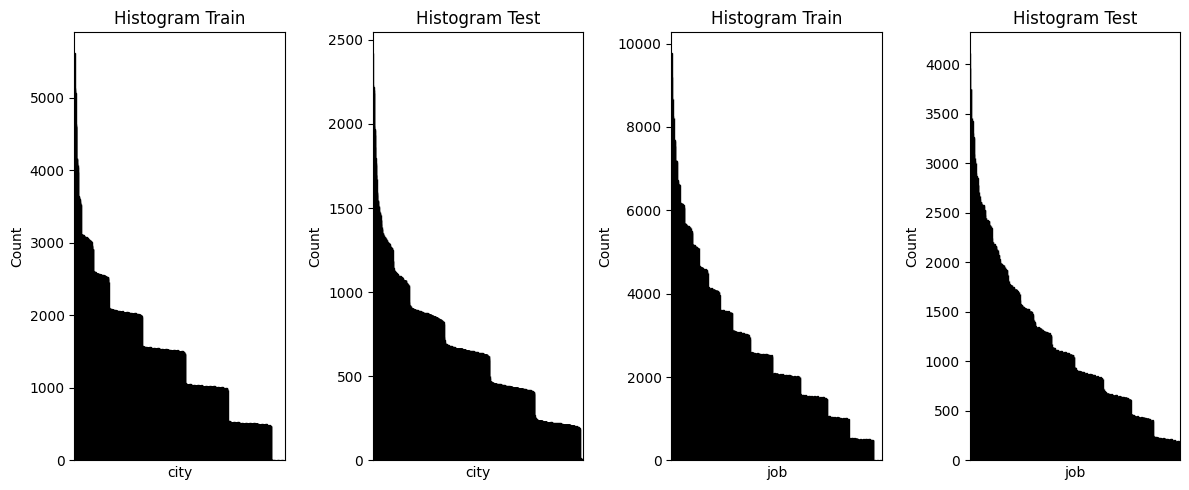

In [4]:
plt.figure(figsize=(12, 5))  

plt.subplot(1, 4, 1)  
counts_tr = df_train['city'].value_counts()
counts_tr.plot.bar(edgecolor='black')
plt.title('Histogram Train')  
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks([])

plt.subplot(1, 4, 2)  
counts_ts = df_test['city'].value_counts()
counts_ts.plot.bar(edgecolor='black')
plt.title('Histogram Test') 
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks([])

plt.subplot(1, 4, 3)  
counts_tr = df_train['job'].value_counts()
counts_tr.plot.bar(edgecolor='black')
plt.title('Histogram Train')  
plt.xlabel('job')
plt.ylabel('Count')
plt.xticks([])

plt.subplot(1, 4, 4)  
counts_ts = df_test['job'].value_counts()
counts_ts.plot.bar(edgecolor='black')
plt.title('Histogram Test') 
plt.xlabel('job')
plt.ylabel('Count')
plt.xticks([])

plt.tight_layout()  
plt.show()

The distribution of cities and jobs taken into account also follow similar distributions.

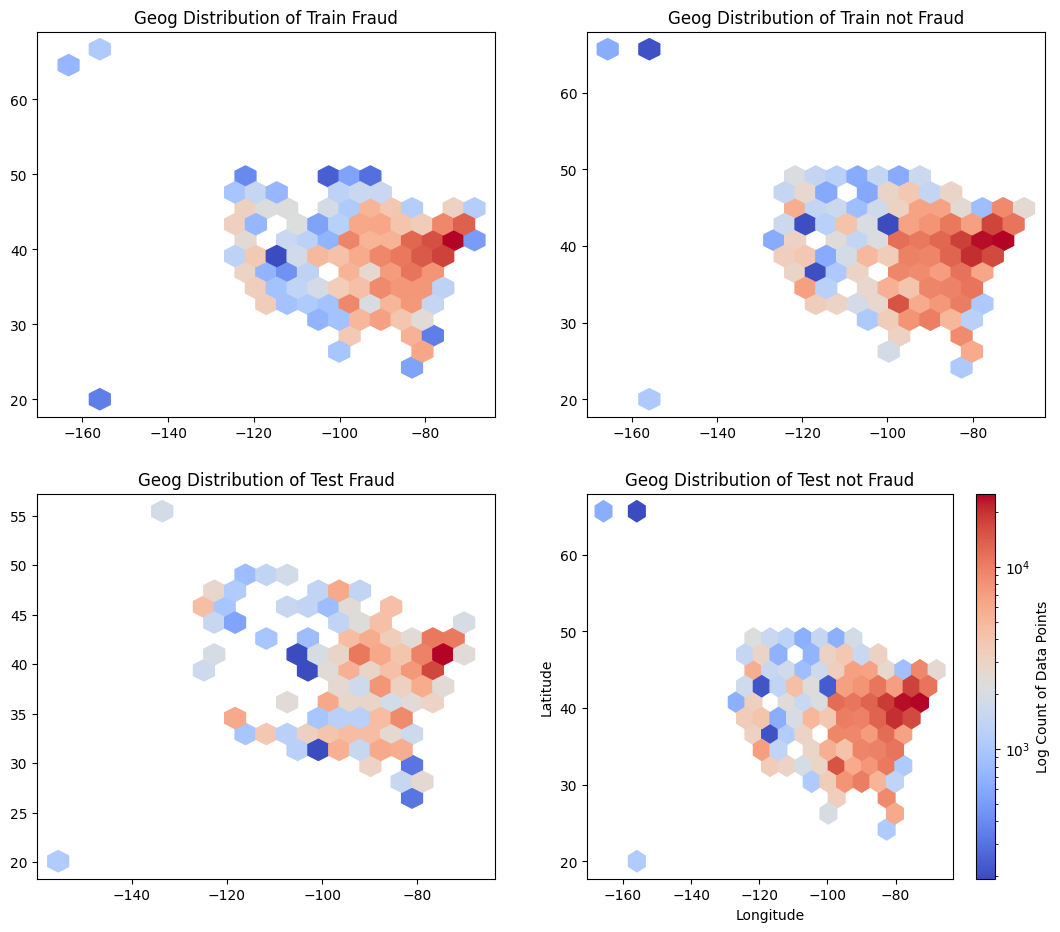

In [5]:
plt.figure(figsize=(13, 11))

fraud_data = df_train[df_train['is_fraud'] == 1]
non_fraud_data = df_train[df_train['is_fraud'] == 0]
plt.subplot(2, 2, 1)
plt.hexbin(fraud_data['long'], fraud_data['lat'], gridsize=20, cmap='coolwarm', bins='log')
plt.title('Geog Distribution of Train Fraud')
plt.subplot(2, 2, 2)
plt.hexbin(non_fraud_data['long'], non_fraud_data['lat'], gridsize=20, cmap='coolwarm', bins='log')
plt.title('Geog Distribution of Train not Fraud')

fraud_data = df_test[df_test['is_fraud'] == 1]
non_fraud_data = df_test[df_test['is_fraud'] == 0]
plt.subplot(2, 2, 3)
plt.hexbin(fraud_data['long'], fraud_data['lat'], gridsize=20, cmap='coolwarm', bins='log')
plt.title('Geog Distribution of Test Fraud')
plt.subplot(2, 2, 4)
plt.hexbin(non_fraud_data['long'], non_fraud_data['lat'], gridsize=20, cmap='coolwarm', bins='log')
plt.title('Geog Distribution of Test not Fraud')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Log Count of Data Points')

plt.show()

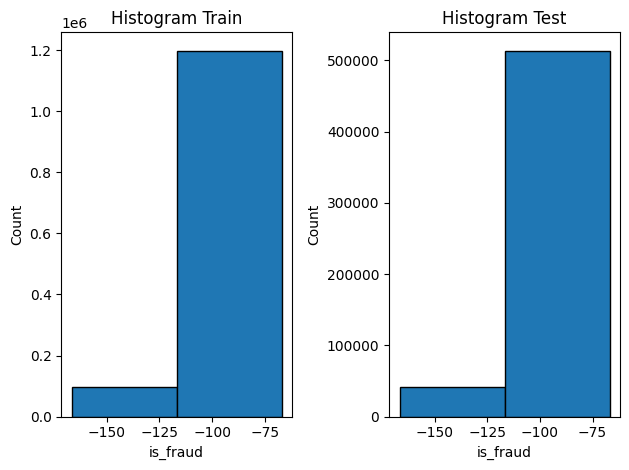

In [6]:
plt.figure()  

plt.subplot(1, 2, 1)  
df_train['merch_long'].plot.hist(bins=2, edgecolor='black')
plt.title('Histogram Train')  
plt.xlabel('is_fraud')
plt.ylabel('Count')

plt.subplot(1, 2, 2)  
df_test['merch_long'].plot.hist(bins=2, edgecolor='black')
plt.title('Histogram Test') 
plt.xlabel('is_fraud')
plt.ylabel('Count')

plt.tight_layout()  
plt.show()

One of the most important information is that the class distributions remain the same for both sets.

## Ground Truth
Determine what relations can we see by looking at our data

<Figure size 1000x600 with 0 Axes>

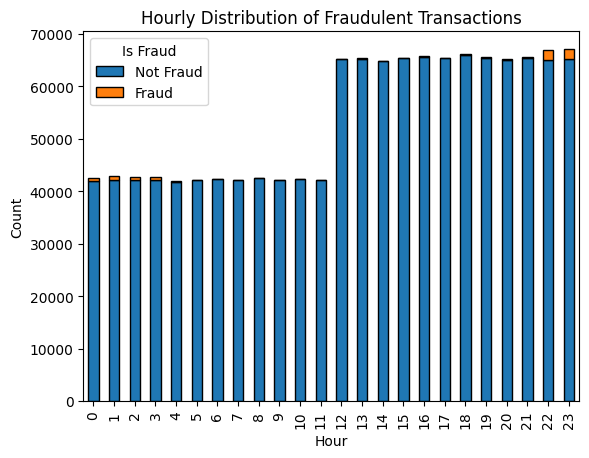

In [7]:
# Ekstrakcja godziny z kolumny 'trans_date_trans_time'
df_train['trans_hour'] = pd.to_datetime(df_train['trans_date_trans_time']).dt.hour

# Grupowanie danych według godzin i etykiety 'is_fraud', a następnie zliczanie ilości transakcji
grouped_data = df_train.groupby(['trans_hour', 'is_fraud']).size().unstack().fillna(0)

# Rysowanie wykresu słupkowego
plt.figure(figsize=(10, 6))
grouped_data[[0, 1]].plot(kind='bar', stacked=True, edgecolor='black')

plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])

plt.show()

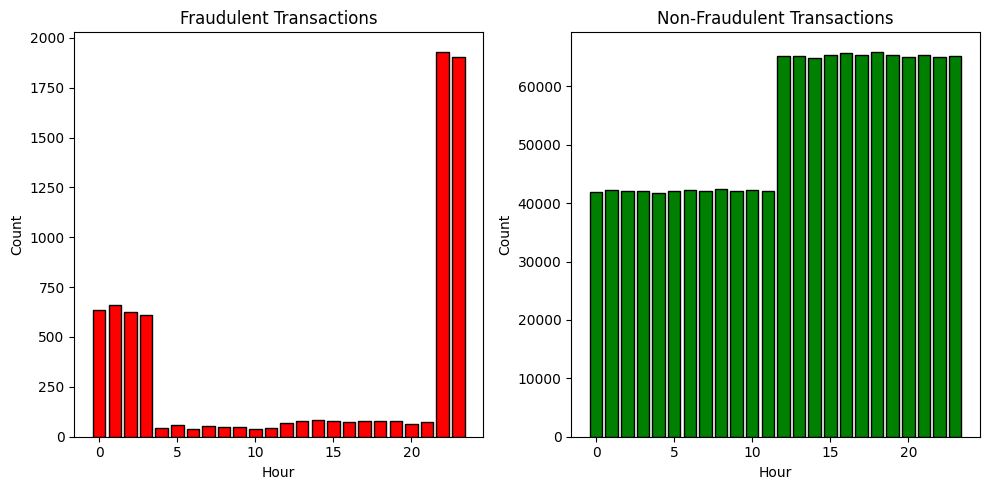

In [8]:
df_train['trans_hour'] = pd.to_datetime(df_train['trans_date_trans_time']).dt.hour
grouped_data = df_train.groupby(['trans_hour', 'is_fraud']).size().unstack().fillna(0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(grouped_data.index, grouped_data[1], color='red', edgecolor='black')
plt.title('Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(grouped_data.index, grouped_data[0], color='green', edgecolor='black')
plt.title('Non-Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

By the above plots we can say that our data follows our intuition and most fraud transactions are made in night hours, we expect to see a similar conclusion from the correlation analysis.

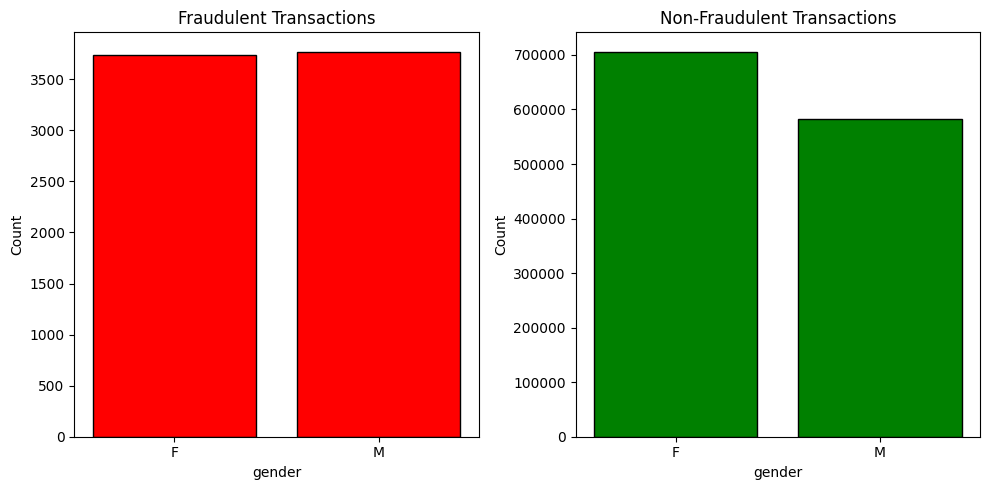

In [9]:
grouped_data = df_train.groupby(['gender', 'is_fraud']).size().unstack().fillna(0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(grouped_data.index, grouped_data[1], color='red', edgecolor='black')
plt.title('Fraudulent Transactions')
plt.xlabel('gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(grouped_data.index, grouped_data[0], color='green', edgecolor='black')
plt.title('Non-Fraudulent Transactions')
plt.xlabel('gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

As we see in the above plot there is no obvious relation between gender and fraud transactions, however, if we take into account that there are about 15% more non-fraud transactions made by women, and almost the same amount of fraud, that would suggest there is a higher chance of fraud transactions for women.

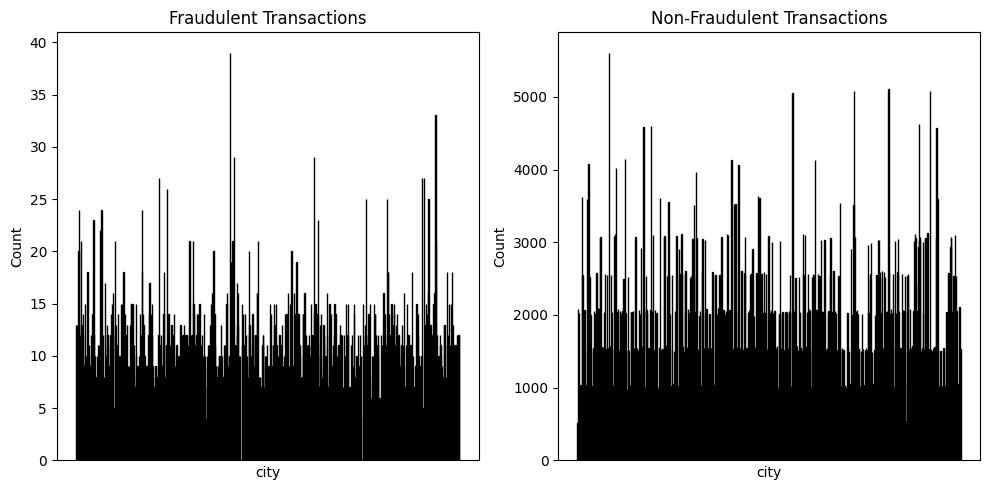

In [10]:
grouped_data = df_train.groupby(['city', 'is_fraud']).size().unstack().fillna(0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(grouped_data.index, grouped_data[1], color='red', edgecolor='black')
plt.title('Fraudulent Transactions')
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks([])

plt.subplot(1, 2, 2)
plt.bar(grouped_data.index, grouped_data[0], color='green', edgecolor='black')
plt.title('Non-Fraudulent Transactions')
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks([])

plt.tight_layout()
plt.show()

It can be noticed that some cities with a high number of transactions do not always have the highest number of fraud transactions, however with that many cities, relations will be better seen by correlation.

## Correlation

Due to the high number of string features it's better to stick to the Spearman correlation and withdraw the Pearson one.

In [11]:
selected_columns = df_train.columns.difference(['is_fraud'])

data = []
index = []
columns = ['Spearman', 'P-value (Spearman)']

for column in selected_columns:
    #pearson_corr, pearson_p_value = pearsonr(df_train[column], df_train['is_fraud'])
    spearman_corr, spearman_p_value = spearmanr(df_train[column], df_train['is_fraud'])
    data.append([spearman_corr, spearman_p_value])
    index.append(column)

correlation_df = pd.DataFrame(data, columns=columns, index=index)

correlation_df

/Users/patrykdabkowski/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


,Spearman,P-value (Spearman)
amt,0.087924,0.000000e+00
category,0.019714,1.266189e-111
cc_num,0.000412,6.390338e-01
city,-0.002061,1.891051e-02
city_pop,0.001325,1.313944e-01
dob,-0.011320,5.067743e-38
first,-0.003351,1.358511e-04
gender,0.007642,3.270677e-18
job,-0.000050,9.544446e-01
last,-0.000080,9.273458e-01
